# AUTOGRAD 

在训练神经网络的时候，最常用的算法就是反向传播算法。在这个算法中，模型参数根据相对于每个给定参数的损失函数的梯度来调整。

为了计算这些梯度，PyTorch 有一个内置的微分运算引擎叫 torch.autograd。它支持对任何计算图自动计算梯度。

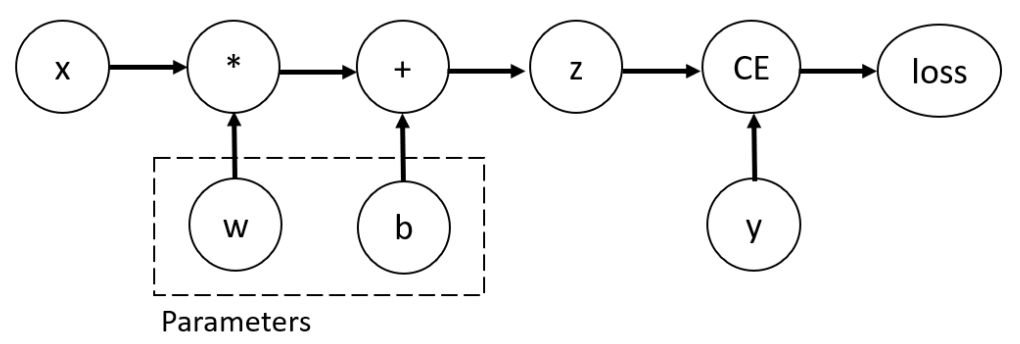

In [2]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [16]:
import numpy as np

n = np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.])
x = torch.from_numpy( n)
y = x*2+0.5 
print(x,y)



tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=torch.float64) tensor([ 2.5000,  4.5000,  6.5000,  8.5000, 10.5000, 12.5000, 14.5000, 16.5000,
        18.5000, 20.5000], dtype=torch.float64)


In [27]:
w = torch.randn(10, 10, requires_grad=True,dtype=torch.float64)
b = torch.randn(10, requires_grad=True,dtype=torch.float64)
 
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss.backward()
print( loss ) 


tensor(36.7538, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [3]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x0000021845A5E080>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x00000218446C8FD0>


In [4]:
print(x,y,w,b,z,loss)

tensor([1., 1., 1., 1., 1.]) tensor([0., 0., 0.]) tensor([[-0.0588,  0.3980, -0.2815],
        [ 1.0403,  1.0520, -1.4326],
        [ 0.3413,  0.4006,  0.9388],
        [-0.1027, -0.8927,  1.3644],
        [ 0.7153, -0.1313, -0.4464]], requires_grad=True) tensor([ 0.1310, -1.0056, -0.1404], requires_grad=True) tensor([ 2.0664, -0.1790,  0.0024], grad_fn=<AddBackward0>) tensor(1.1625, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [5]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2959, 0.1518, 0.1669],
        [0.2959, 0.1518, 0.1669],
        [0.2959, 0.1518, 0.1669],
        [0.2959, 0.1518, 0.1669],
        [0.2959, 0.1518, 0.1669]])
tensor([0.2959, 0.1518, 0.1669])
